# Polynomial Approximation of Sine Function using PyTorch

This notebook demonstrates how to use PyTorch's automatic differentiation (autograd) to fit a third-order polynomial to the sine function over the interval [-π, π]. The implementation:

1. Uses PyTorch tensors to construct a polynomial: y = a + bx + cx² + dx³
2. Minimizes the squared Euclidean distance between the polynomial and sin(x)
3. Employs gradient descent with PyTorch's autograd for optimization
4. Visualizes the results to compare the fitted polynomial with the true sine function

Key concepts demonstrated:
- PyTorch tensor operations
- Automatic differentiation for gradient computation
- Gradient descent optimization
- Model fitting and visualization

Note: A PyTorch tensor with `requires_grad=True` represents a node in the computational graph, enabling automatic gradient computation during the backward pass. These gradients are stored in the tensor's `.grad` attribute.


In [2]:
import torch
import math

# first check if we have GPU access or not. If not, use cpu. 

dtype = torch.float
device = "cuda" if torch.cuda.is_available() else "cpu"
torch.set_default_device(device)

### Input and Output Tensor Initialization 
Create Tensors to hold input and outputs.
In PyTorch, the default condition `requires_grad=False` for tensors means that these tensors are not part of the gradient computation graph. Therefore, during the backward pass, PyTorch will not compute gradients with respect to these tensors. This is typically used for input and output data, where you do not need to update these values based on the optimization process. 

In the context of the script, `x` and `y` are initialized with `requires_grad=False` because they represent fixed data points (input values and target sine values) that should not be altered during training. Only the weights (`a`, `b`, `c`, and `d`) need to have `requires_grad=True` so that their gradients can be computed and used to update their values during training.

In [3]:
x = torch.linspace(-math.pi, math.pi, 2000, dtype=dtype)
y = torch.sin(x)

### Explanation of Weight Tensor Initialization

In the context of fitting a third-order polynomial using PyTorch, the script initializes random tensors to represent the polynomial's coefficients. The polynomial is expressed as:

$$
y = a + b \cdot x + c \cdot x^2 + d \cdot x^3
$$

#### Key Points:

1. **Weight Initialization**:
   - Four tensors are created: `a`, `b`, `c`, and `d`. These tensors are initialized with random values. Each tensor represents a coefficient in the polynomial equation.
   
2. **Gradient Tracking**:
   - The property `requires_grad=True` is set for each of these tensors. This setting is crucial for optimization, as it tells PyTorch to track operations on these tensors and compute their gradients during the backward pass.
   - Gradients are necessary for updating the weights using gradient descent, which aims to minimize the loss function by adjusting these weights.

By enabling gradient tracking, the script ensures that during the training process, the gradients of the loss with respect to each of these weights are computed. These gradients are then used to update the weights in the direction that reduces the loss, thereby improving the polynomial's fit to the data.

In [4]:
a = torch.randn((), dtype=dtype, requires_grad=True)
b = torch.randn((), dtype=dtype, requires_grad=True)
c = torch.randn((), dtype=dtype, requires_grad=True)
d = torch.randn((), dtype=dtype, requires_grad=True)

### Detailed Explanation of the Training Loop

This section of the script implements a basic training loop to fit a third-order polynomial to the sine function using gradient descent. Here’s a step-by-step breakdown of the process:

#### 1. **Learning Rate Initialization**
-  `learning_rate = 1e-6`: This small scalar value determines the step size during the weight update process. It controls how much the weights are adjusted with respect to the computed gradients. A smaller learning rate ensures gradual updates, which can lead to more stable convergence.

#### 2. **Training Loop**
-  `for t in range(2000)`: This loop runs for 2,000 iterations, representing the training process over multiple epochs.

#### 3. **Forward Pass**
-  `y_pred = a + b * x + c * x ** 2 + d * x ** 3`: This line computes the predicted values `y_pred` using the current weights (`a`, `b`, `c`, `d`) and the input tensor `x`. This is the forward pass where the model makes predictions based on the current state of the weights.

#### 4. **Loss Calculation**
-  `loss = (y_pred - y).pow(2).sum()`: The loss is computed as the sum of squared differences between the predicted values `y_pred` and the actual values `y`. This is a common loss function for regression tasks, known as the mean squared error (MSE), which measures how well the polynomial fits the sine curve.
-  `if t % 100 == 99: print(t, loss.item())`: Every 100 iterations, the current loss value is printed to monitor the training progress. `loss.item()` extracts the scalar value from the loss tensor for easy reading.

#### 5. **Backward Pass**
-  `loss.backward()`: This call to `backward()` computes the gradient of the loss with respect to all parameters that have `requires_grad=True`. PyTorch's autograd system automatically calculates these gradients and stores them in the `.grad` attribute of each parameter tensor (`a.grad`, `b.grad`, `c.grad`, `d.grad`).

#### 6. **Weights Update**
-  `with torch.no_grad():`: The weight update is performed within a `torch.no_grad()` block to prevent PyTorch from tracking these operations in the computational graph, as they are not part of the gradient computation.
  - `a -= learning_rate * a.grad`: The weight `a` is updated by subtracting the product of the learning rate and its gradient. This step moves `a` in the direction that reduces the loss.
  - Similarly, `b`, `c`, and `d` are updated.

#### 7. **Resetting Gradients**
-  `a.grad = None`, `b.grad = None`, `c.grad = None`, `d.grad = None`: After updating the weights, the gradients are manually reset to `None`. This is important because PyTorch accumulates gradients by default, so clearing them after each update prevents interference from previous iterations.

#### 8. **Result Output**
-  `print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3')`: After completing all iterations, the script prints the final polynomial equation with the optimized coefficients. These coefficients represent the best fit for approximating the sine function over the specified interval.

This loop effectively demonstrates the core principles of training a model using gradient descent: forward pass, loss computation, backward pass, and parameter update.

In [5]:
learning_rate = 1e-6
for t in range(2000):
    # Forward pass: compute predicted y using operations on Tensors.
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss using operations on Tensors.
    # Now loss is a Tensor of shape (1,)
    # loss.item() gets the scalar value held in the loss.
    loss = (y_pred - y).pow(2).sum()
    if t % 100 == 99:
        print(t, loss.item())

    # Use autograd to compute the backward pass. This call will compute the
    # gradient of loss with respect to all Tensors with requires_grad=True.
    # After this call a.grad, b.grad. c.grad and d.grad will be Tensors holding
    # the gradient of the loss with respect to a, b, c, d respectively.
    loss.backward()

    # Manually update weights using gradient descent. Wrap in torch.no_grad()
    # because weights have requires_grad=True, but we don't need to track this
    # in autograd.
    with torch.no_grad():
        a -= learning_rate * a.grad
        b -= learning_rate * b.grad
        c -= learning_rate * c.grad
        d -= learning_rate * d.grad

        # Manually zero the gradients after updating weights
        a.grad = None
        b.grad = None
        c.grad = None
        d.grad = None

print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3')


99 276.7035217285156
199 196.17332458496094
299 139.93673706054688
399 100.63668060302734
499 73.15364074707031
599 53.92192840576172
699 40.45592498779297
799 31.021404266357422
899 24.407743453979492
999 19.768999099731445
1099 16.513769149780273
1199 14.22832202911377
1299 12.623000144958496
1399 11.494915008544922
1499 10.701861381530762
1599 10.14411449432373
1699 9.751714706420898
1799 9.475545883178711
1899 9.28111743927002
1999 9.144190788269043
Result: y = -0.01859428733587265 + 0.8609141111373901 x + 0.0032078209333121777 x^2 + -0.09392400085926056 x^3


### Testing the estimation!

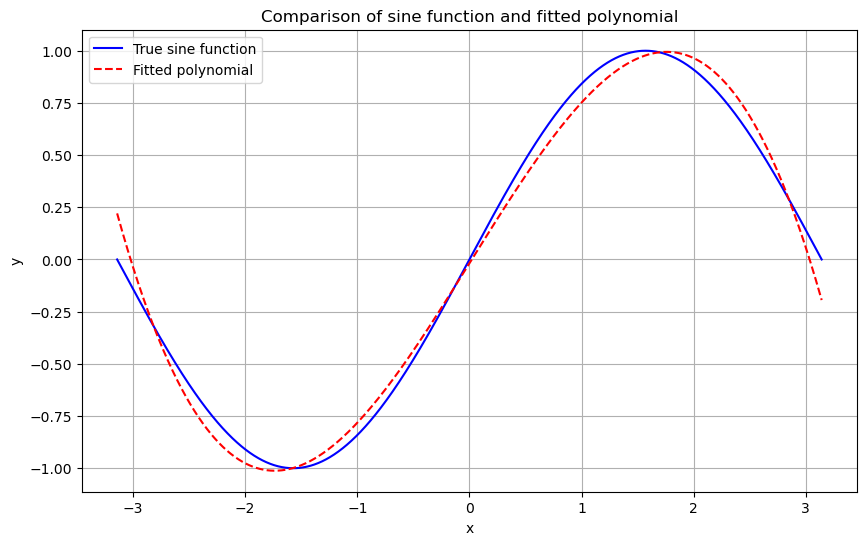

Maximum absolute error: 0.22065773606300354


In [6]:
import matplotlib.pyplot as plt

# Compute the final predicted y values
with torch.no_grad():
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

# Convert tensors to numpy arrays for plotting
x_np = x.cpu().numpy()
y_np = y.cpu().numpy()
y_pred_np = y_pred.cpu().numpy()

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(x_np, y_np, 'b-', label='True sine function')
plt.plot(x_np, y_pred_np, 'r--', label='Fitted polynomial')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Comparison of sine function and fitted polynomial')
plt.legend()
plt.grid(True)
plt.show()

# Print the maximum absolute error
max_error = torch.max(torch.abs(y_pred - y)).item()
print(f'Maximum absolute error: {max_error}')